Implementing a Random Forest for classification

A decision tree allows us to have an intelligibile representation of the classifications which our algorithm uses for prediction. This may be a useful approach here to understand what exactly we are doing and not have a 'black box' algorithm where this is all hidden - adding simplicity and readability to our end result.
Based on our prior knowledge of the events of the titanic such as large differences in survivability for age and sex, I feel this approach could be powerful.

A random forest creates many decision trees and classifies according to the majority. This is useful as decision trees have a habit of overfitting to the data.

Firstly, as mentioned in the previous sections, we will need to remove and encode some factors in our dataset.

This notebook and the data handling is based on the code from 'https://www.kaggle.com/code/zlatankr/titanic-random-forest-82-78'

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import data_functions as df

In [105]:
train = pd.read_csv('TrainTestData/train.csv')
test = pd.read_csv('TrainTestData/test.csv')

In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
train, test = df.names(train, test)
train, test = df.age_impute(train, test)
train, test = df.cabin_num(train, test)
train, test = df.cabin(train, test)
train, test = df.embarked_impute(train, test)
train, test = df.fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = df.ticket_grouped(train, test)
train, test = df.dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = df.drop(train, test)

Different approaches to data in this problem lead to different results, as described previously, we can introduce more variables using the 'titles' rather than just using 'sex'. Further variables can be captured from the cabin letters and numbers, family size etc,

In [ ]:
train.head()

We can now train a random forest on the training data

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

rf = RandomForestClassifier(criterion='gini',
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


Below is an example of one of the decision trees from the random forest. We see the readability of the tree is quite difficult, as we used many features. This may worry us about overfitting to the data.
As per our parameter choice when we fit the model, there are 700 generated trees.

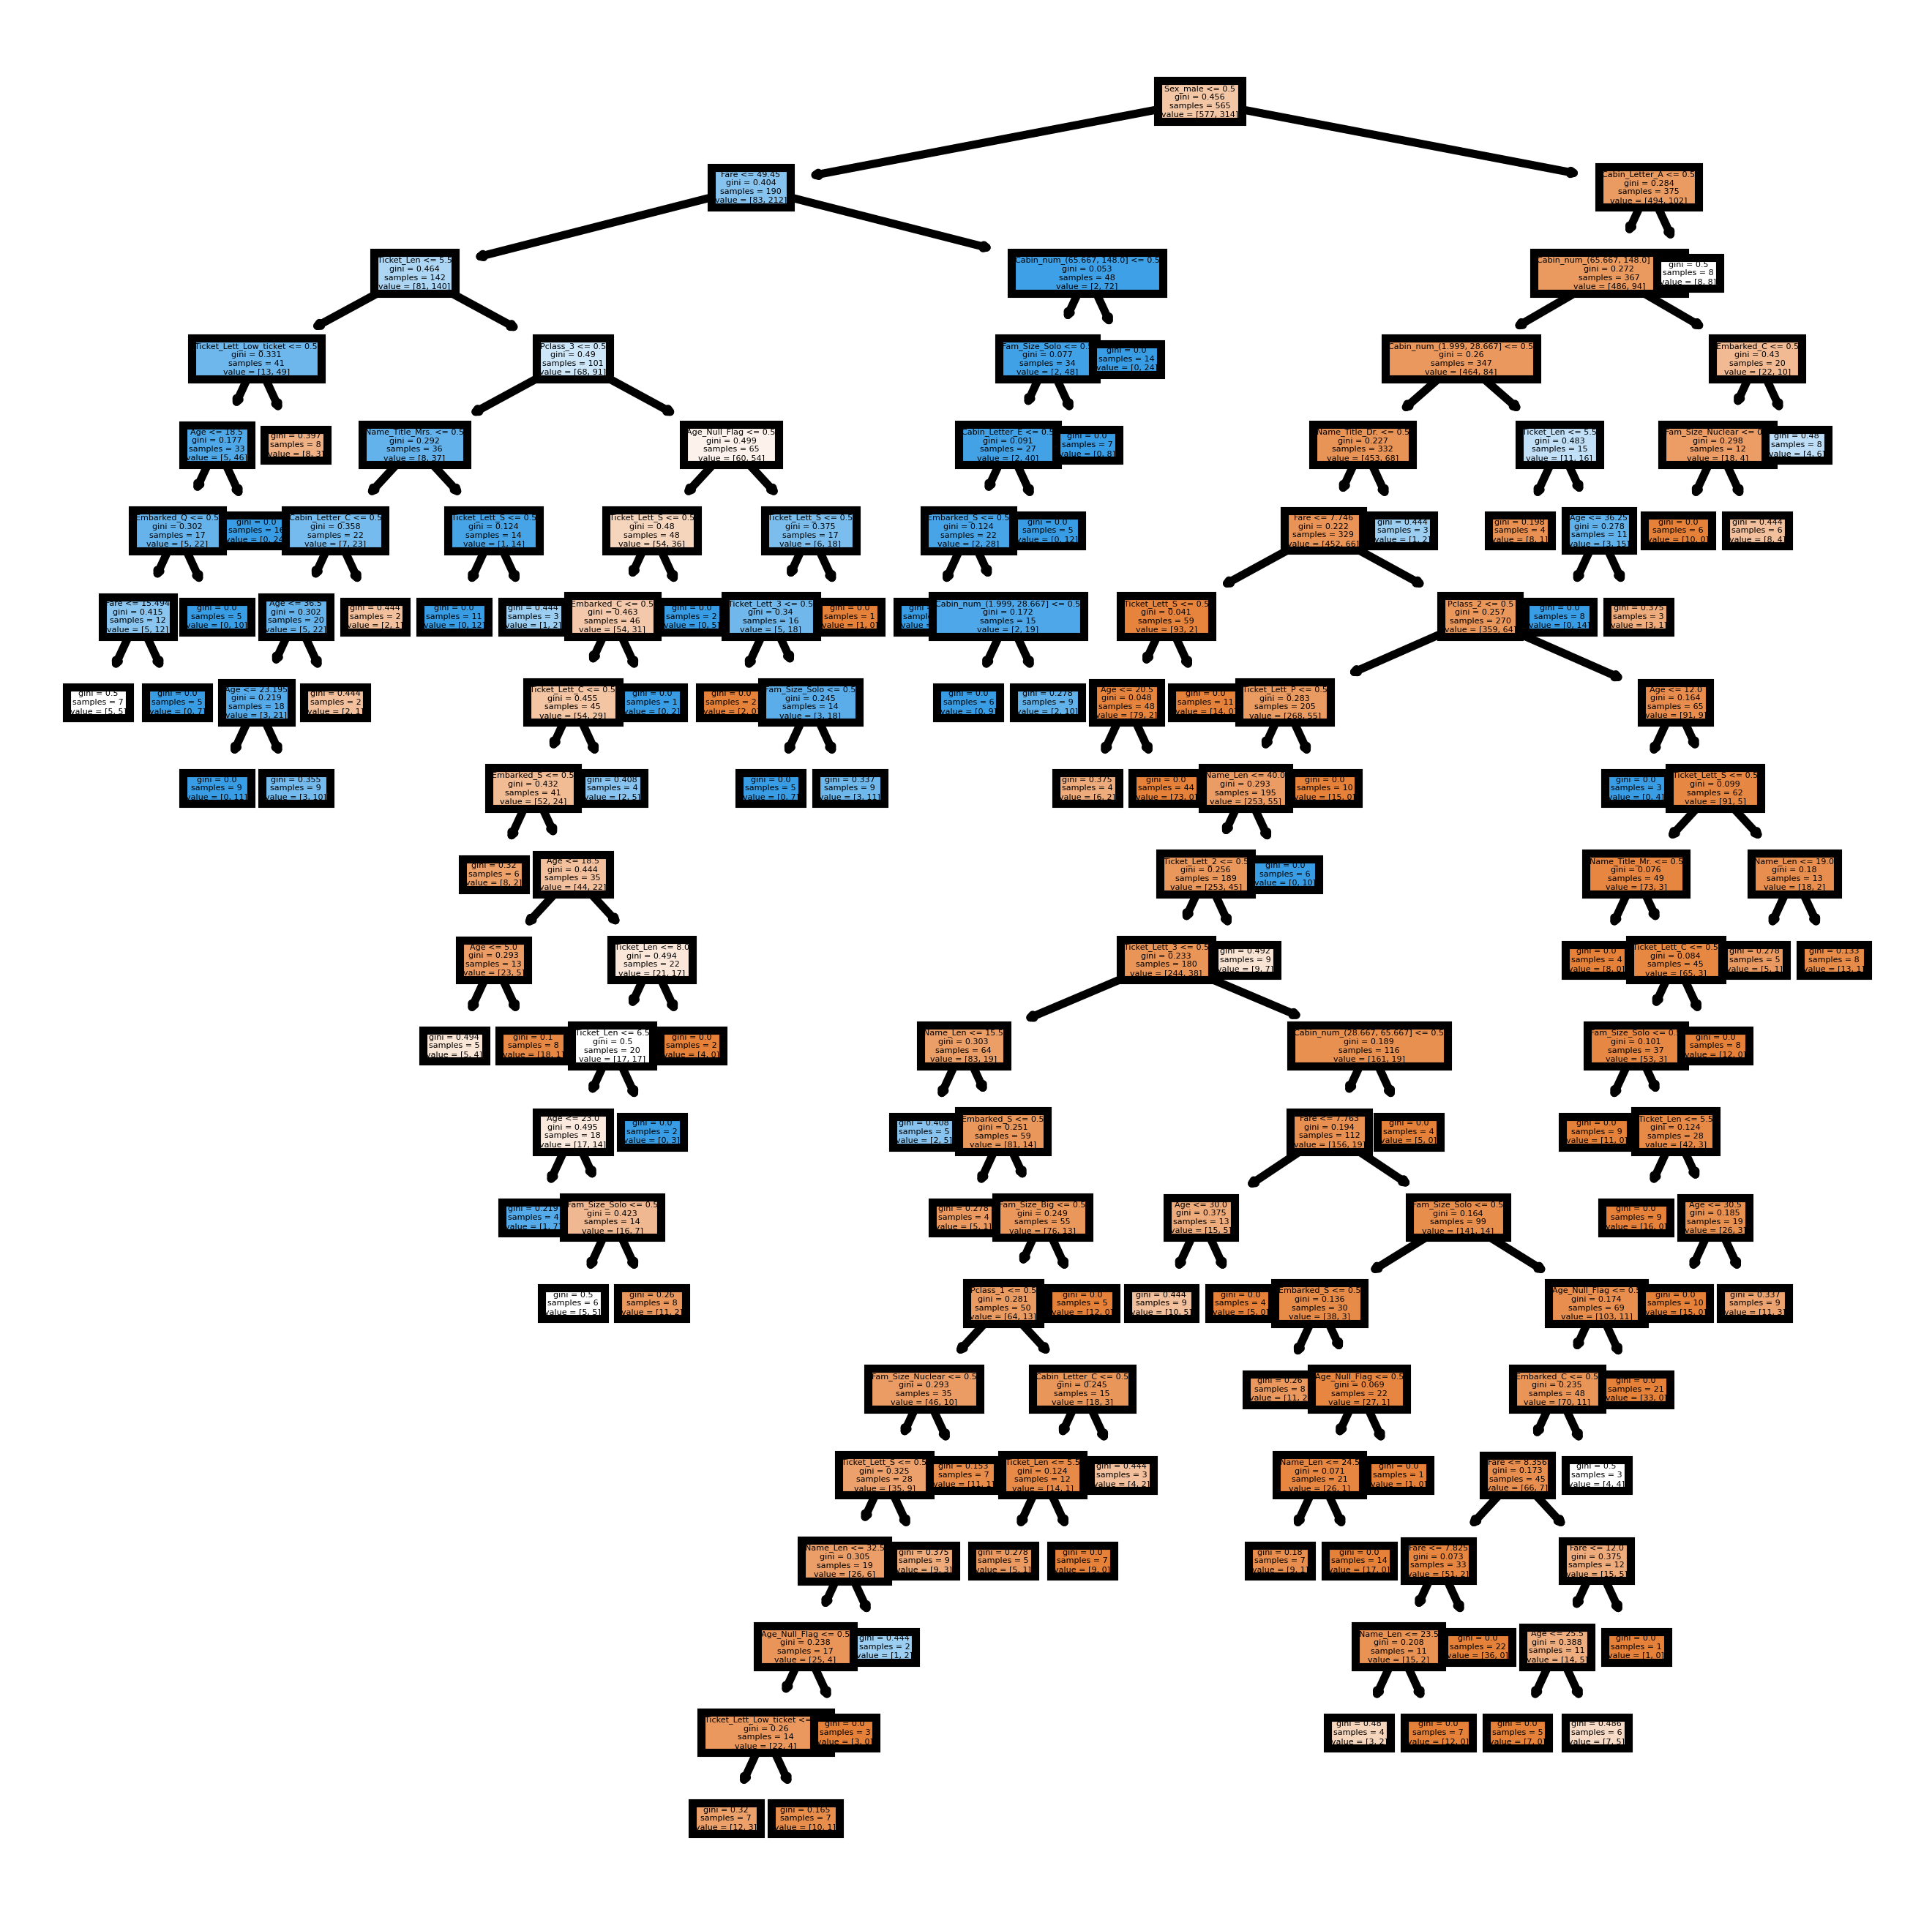

In [118]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = train.iloc[:, 1:].columns,
               filled = True);
fig.savefig('rf_individualtree.png')

From the random forest, we can output a metric of importance on each of the variables used. Sex being most important is predictable given what we know about the events of the titanic.

In [121]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']),
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])),
          axis = 1).sort_values(by='importance', ascending = False)[:20]



,variable,importance
12,Sex_female,0.111215
11,Sex_male,0.109769
33,Name_Title_Mr.,0.109746
1,Fare,0.088209
2,Name_Len,0.087904
0,Age,0.078651
8,Pclass_3,0.043268
35,Name_Title_Miss.,0.031292
7,Ticket_Len,0.031079
34,Name_Title_Mrs.,0.028852
